##**CLASIFICACIÓN**

> **Proyecto No. 2**


*Juan Felipe Yepes*

*Jennifer Paola Sanchez*

*Linda Camila Castañeda*


##**Descripción de la Base de Datos**

Esta base de datos fue tomada del repositorio de Machine Learning de UCI, y contiene información sobre el absentismo en el trabajo desde julio de 2007 a julio de 2010 de una empresa de mensajería en Brasil. Estas cifras y los análisis que se infieran de las mismas son útiles para idear estrategias que promuevan la productividad en las empresas. 

La base de datos será extraida desde Excel, debido a que en la página de UCI la información no se encontraba en formato .data, por lo cual no puede extraerse a través de una API.

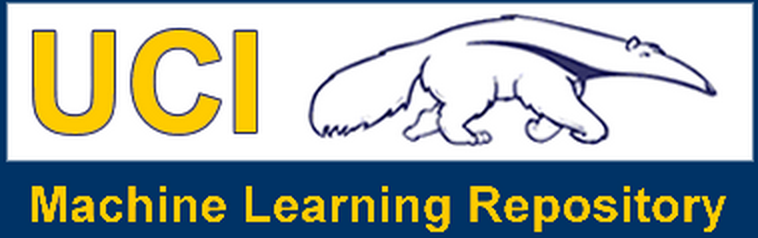

##**Exploración de la Base de Datos**

In [ ]:
import pandas as pd
absentismo = pd.read_excel("/content/Absenteeism_at_work.xlsx")
absentismo

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


Se cuenta con una muestra de 740 trabajadores, evaluados de acuerdo a 21 categorías, dentro de las cuales entre las de mayor importancia para este estudio se encuentran la razón de fallar a la jornada laboral y diferentes aspectos sociales que pueden llegar a incidir en el absentismo.

In [ ]:
absentismo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

Las 21 categorías de la base, cuentan con datos de tipo integer. Cabe resaltar que categorias como "Reason for absence", aunque cuenta con integers, representan un string de razones de absentismo. 

Adicionalmente, según la UCI y explorando la base de datos, se puede evidenciar que no tiene datos faltantes, por lo que no se requiere una limpieza profunda de los datos. 


In [ ]:
reasons_for_absence = absentismo["Reason for absence"].value_counts()
reasons_for_absence
import matplotlib.pyplot as plt

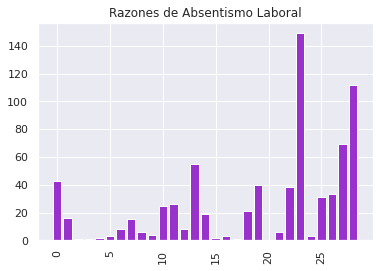

In [ ]:
fig, ax =plt.subplots()
ax.bar(reasons_for_absence.index, reasons_for_absence.values,
       color = "darkorchid")
plt.xticks(rotation = 90)
ax.set_title("Razones de Absentismo Laboral")
plt.show()

In [ ]:
Head3_razones_principales = absentismo["Reason for absence"].value_counts().head(3)
Head3_razones_principales

23    149
28    112
27     69
Name: Reason for absence, dtype: int64

Las razones más frecuentes por las que un trabajador se ausenta de sus labores son: Consulta médica (23), consulta odontológica (28) y fisioterápia (27). Estas tres razones representan aproximadamente el 45% del total de excusas. 

In [ ]:
Tail3_razones_principales = absentismo["Reason for absence"].value_counts().tail(3)
Tail3_razones_principales

3     1
2     1
17    1
Name: Reason for absence, dtype: int64

Las razones menos frecuentes por las que un trabajador se ausenta de sus labores estan asociadas, particularmente, a enfermedades: Enfemedades de la sangre  y sistema inmune (3), cáncer (2) y malformaciones congénitas (17).

##**Transformación de la Base de Datos**



In [ ]:
mi_filtro = ["23", "28"]
new_absentismo = absentismo[absentismo["Reason for absence"].isin(mi_filtro)]
new_absentismo

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
7,20,23,7,6,1,260,50,11,36,239554,97,0,1,4,1,0,0,65,168,23,4
14,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,15,28,5,5,3,291,31,12,40,237656,99,0,1,1,1,0,1,73,171,25,2
702,14,23,5,4,3,155,12,14,34,237656,99,0,1,2,1,0,0,95,196,25,2
718,15,28,6,5,3,291,31,12,40,275089,96,0,1,1,1,0,1,73,171,25,2
728,34,28,7,2,1,118,10,10,37,264604,93,0,1,0,0,0,0,83,172,28,4


### Variables de interés

In [ ]:
absentismo_variables_1 = new_absentismo[["Reason for absence", "Disciplinary failure", "Education", "Son", "Social drinker", "Social smoker"]]
absentismo_variables_1

,Reason for absence,Disciplinary failure,Education,Son,Social drinker,Social smoker
2,23,0,1,0,1,0
4,23,0,1,2,1,0
5,23,0,1,0,1,0
7,23,0,1,4,1,0
14,23,0,1,0,1,0
...,...,...,...,...,...,...
699,28,0,1,1,1,0
702,23,0,1,2,1,0
718,28,0,1,1,1,0
728,28,0,1,0,0,0


In [ ]:
absentismo_variables["Reason for absence"].value_counts()

23    149
28    112
Name: Reason for absence, dtype: int64

Existen 149 empleados que justificaron su absentismo con consulta médica (23). Por otra parte, 112 se justificaron con una consulta odontológica (28).

In [ ]:
absentismo_variables["Disciplinary failure"].value_counts()

0    261
Name: Disciplinary failure, dtype: int64

La variable fallas disciplinarias se aísla del análisis del modelo, dado que para estas dos razones de absentismo todos los valores son 0, esto quiere decir que los trabajadores que se excusaron con alguna de estas dos razones no presentan falla disciplinaria dentro de su conducta laboral.

In [ ]:
absentismo_variables_1["Education"].value_counts()

1    239
3     17
2      4
4      1
Name: Education, dtype: int64

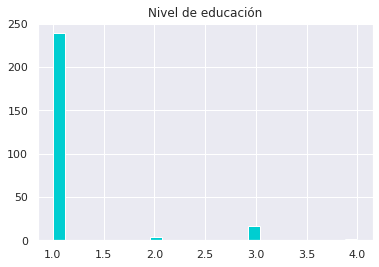

In [ ]:
fig, ax = plt.subplots()
ax.hist(absentismo_variables_1["Education"], color = "darkturquoise", bins = 25)
ax.set_title("Nivel de educación")
plt.show()

239 empleados de la empresa de mensajería que tuvieron absentismo laboral por consulta médica o cita odontológica, cuentan con formación básica secundaría (1). Por otra parte, 17 cuentan con eduación posgradual (3), 4 con formación de pregrado (2), y 1 cuenta con maestría y doctorado (4). 


In [ ]:
absentismo_variables["Education"].describe()

count    261.000000
mean       1.157088
std        0.535506
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Education, dtype: float64

Existen 261 observaciones, con una media de 1.157088, que muestra que un gran porcentaje de los empleados que tuvieron absentismo por consulta médica o consulta odonotológica cuentan con educación básica secundaria, lo cual indica que, en su mayoría, tienen niveles relativamente bajos de formación académica. 


In [ ]:
absentismo_variables["Son"].value_counts()

0    101
1     97
2     38
4     22
3      3
Name: Son, dtype: int64

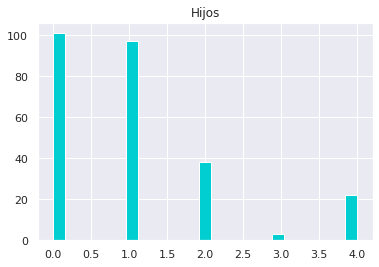

In [ ]:
fig, ax = plt.subplots()
ax.hist(absentismo_variables_1["Son"], color = "darkturquoise", bins = 25)
ax.set_title("Hijos")
plt.show()

De los 261 empleados que presentaron absentismo por las razones descritas anteriormente, 101 no tienen hijos, 97 tienen 1 hijo, 38 tienen 2 hijos, 22 tienen 4 hijos, y 3 tienen 3 hijos. 

In [ ]:
absentismo_variables["Son"].describe()

count    261.000000
mean       1.034483
std        1.158065
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Son, dtype: float64

La media de hijos de los 261 empleados es 1.034483, lo cual indica, en primera instancia, que en su gran mayoría los absentismos no estarían explicados por el número de hijos. 


In [ ]:
absentismo_variables["Social drinker"].value_counts()

1    154
0    107
Name: Social drinker, dtype: int64

De los 261 empleados que presentaron absentismo por las razones descritas anteriormente, 154 son considerados como bebedores sociales, es decir, que beben alcohol de manera regular en una gran variedad de espacios sociales. Por otra parte, los restantes 107, no son considerados como tal. 


In [ ]:
absentismo_variables["Social smoker"].value_counts()

0    253
1      8
Name: Social smoker, dtype: int64

De los 261 empleados que presentaron absentismo por las razones descritas anteriormente, 253 no se consideran fumadores sociales, es decir, que fuman de manera regular en una gran variedad de espacios sociales. Por otra parte, los restantes 8, si son considerados como tal.

In [ ]:
# Se extrae la variable "Disciplinary failure", por la razón anteriormente expuesta. 
absentismo_variables = new_absentismo[["Reason for absence", "Education", "Son", "Social drinker", "Social smoker"]]
absentismo_variables 

,Reason for absence,Education,Son,Social drinker,Social smoker
2,23,1,0,1,0
4,23,1,2,1,0
5,23,1,0,1,0
7,23,1,4,1,0
14,23,1,0,1,0
...,...,...,...,...,...
699,28,1,1,1,0
702,23,1,2,1,0
718,28,1,1,1,0
728,28,1,0,0,0


In [ ]:
# REASON FOR ABSENCE
# 0 = Consulta médica
absentismo_variables["Reason for absence"] = absentismo_variables["Reason for absence"].replace([23], 0) 
# 1 = Consulta Odontológica
absentismo_variables["Reason for absence"] = absentismo_variables["Reason for absence"].replace([28], 1) 

# EDUCACIÓN
# 0 = trabajadores con menor educación (1, 2)
absentismo_variables["Education"] = absentismo_variables["Education"].replace([1, 2], 0) 
# 1 = trabajadores con mayor educación (3, 4)
absentismo_variables["Education"] = absentismo_variables["Education"].replace([3, 4], 1) 

# NRO. DE HIJOS
# 1 = Trabajadores con hijos (1, 2, 3, 4). 
# 0 = Trabajadores sin hijos = 0.
absentismo_variables["Son"] = absentismo_variables["Son"].replace([1, 2, 3, 4], 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
absentismo_variables

,Reason for absence,Education,Son,Social drinker,Social smoker
2,0,0,0,1,0
4,0,0,1,1,0
5,0,0,0,1,0
7,0,0,1,1,0
14,0,0,0,1,0
...,...,...,...,...,...
699,1,0,1,1,0
702,0,0,1,1,0
718,1,0,1,1,0
728,1,0,0,0,0


Con el código anteriormente descrito, se obtiene una base de datos de categorías con datos binarios para trabajar con los modelos de clasificación.

Dado que "Social Drinker" y "Son" son las variables que cuentan con resultados binarios más equitativos, serán las dos a estudiar en los modelos de clasificación. Las demás variables, al encajar la mayoría de sus resultados en una única categoría (1 o 0), se torna evidente su predicción.  

In [ ]:
absentismo_variables_son = absentismo_variables[["Reason for absence", "Son"]]
absentismo_variables_son

,Reason for absence,Son
2,0,0
4,0,1
5,0,0
7,0,1
14,0,0
...,...,...
699,1,1
702,0,1
718,1,1
728,1,0


In [ ]:
absentismo_variables_drinker = absentismo_variables[["Reason for absence", "Social drinker"]]
absentismo_variables_drinker

,Reason for absence,Social drinker
2,0,1
4,0,1
5,0,1
7,0,1
14,0,1
...,...,...
699,1,1
702,0,1
718,1,1
728,1,0


In [ ]:
import numpy as np

## **Modelos Binarios de Clasificación (SON)**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

y = absentismo_variables_son["Reason for absence"]
X = absentismo_variables_son["Son"]

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.5, random_state = 1111)

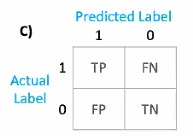

###Logistic Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logistic_1 = LogisticRegression(random_state = 1111, max_iter = 1000)
logistic_1.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

y_pred_1_in = logistic_1.predict(X_train[:, np.newaxis])
y_pred_1_out = logistic_1.predict(X_eval[:, np.newaxis])

prob_1_in = logistic_1.predict_proba(X_train[:, np.newaxis])

print("Probabilidades")
print(prob_1_in)
print("Predicción de Clase")
print(y_pred_1_in)

print("Error cuadrático en muestra", mean_squared_error(y_train, y_pred_1_in))
print("Error cuadrático en muestra", mean_squared_error(y_eval, y_pred_1_out))

cm_logistic_in = confusion_matrix(y_train, y_pred_1_in)
cm_logistic_out = confusion_matrix(y_eval, y_pred_1_out)

print(logistic_1.coef_)

print(cm_logistic_in)
print(cm_logistic_out)

Probabilidades
[[0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.609397

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing inst

Para el anáisis Logístico, tanto dentro de muestra y por fuera de muestra, se cuenta con más verdaderos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo logit puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a tener o no tener hijos. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos. 

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB 

NB_2 = MultinomialNB()
NB_2.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

y_pred_2_in = NB_2.predict(X_train[:, np.newaxis])
y_pred_2_out = NB_2.predict(X_eval[:, np.newaxis])

prob_2_in = NB_2.predict_proba(X_train[:, np.newaxis])

print("Probabilidades")
print(prob_2_in)
print("Predicción de Clase")
print(y_pred_2_in)

cm_NB_in = confusion_matrix(y_train, y_pred_2_in)
cm_NB_out = confusion_matrix(y_eval, y_pred_2_out)

print(NB_2.coef_)

print(cm_NB_in)
print(cm_NB_out)

Probabilidades
[[0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.553846

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing inst

Para el caso de este modelo, no es posible confiar en las probabilidades obtenidas, ya que sería inutil realizar predicciones sobre un modelo que le asigna una probabilidad de 0 a todas las características observadas. Si nos detenemos a observar las predicciones de clase, todas estas arrojan 0, lo cual es sesgado si se tiene en cuenta que en la matriz de confusión, existen 58 falsos positivos dentro de muestra, y 54 fuera de la misma.



### Linear Discriminar Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_3 = LinearDiscriminantAnalysis() 
LDA_3.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])

y_pred_3_in = LDA_3.predict(X_train[:, np.newaxis])
y_pred_3_out = LDA_3.predict(X_eval[:, np.newaxis])

prob_3_out = LDA_3.predict_proba(X_eval[:, np.newaxis])

print("Probabilidades")
print(prob_3_out)
print("Predicción de Clase")
print(y_pred_3_out)

cm_LDA_in = confusion_matrix(y_train, y_pred_3_in)
cm_LDA_out = confusion_matrix(y_eval, y_pred_3_out)

print(LDA_3.coef_)

print(cm_LDA_in)
print(cm_LDA_out)

Probabilidades
[[0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.61662538 0.38337462]
 [0.47368197 0.52631803]
 [0.47368197 0.52631803]
 [0.61662538 0.38337462]
 [0.616625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert 

Para el anáisis a través del modelo Linear Discriminar Analysis, tanto dentro de muestra y por fuera de muestra, se cuenta con más verdaderos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo LDA puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a tener o no tener hijos. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos dentro de muestra. 

***Adicionalmente, para este modelo, se encuentra que hay más probabilidad de que los siguientes casos de absentismo laboral en esta empresa de mensajería de Brasil, para las dos principales razones descritas anteriormente, correspondan a un individuo que no tenga hijos.***


###Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC


SVC_4 = SVC(kernel= "linear", probability=True)
SVC_4.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])
y_pred_4_in = SVC_4.predict(X_train[:, np.newaxis])
y_pred_4_out = SVC_4.predict(X_eval[:, np.newaxis])

prob_4_out = SVC_4.predict_proba(X_eval[:, np.newaxis])
print("Probabilidades")
print(prob_4_out)
print("Predicción de Clase")
print(y_pred_4_out)

cm_svm_in = confusion_matrix(y_train, y_pred_4_in)
cm_svm_out = confusion_matrix(y_eval, y_pred_4_out)

print(SVC_4.coef_)

print(cm_svm_in)
print(cm_svm_out)


Probabilidades
[[0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.54846414 0.45153586]
 [0.56696982 0.43303018]
 [0.56696982 0.43303018]
 [0.54846414 0.45153586]
 [0.548464

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will

Para el anáisis a través del modelo Vector Machine, tanto dentro de muestra y por fuera de muestra, se cuenta con más verdederos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo Vector Machine puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a tener o no tener hijos. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos dentro de muestra. 

##**Modelos Binarios de Clasificación (SOCIAL DRINKER)**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

y_2 = absentismo_variables_drinker["Reason for absence"]
X_2 = absentismo_variables_drinker["Social drinker"]

X_2train, X_2eval, y_2train, y_2eval = train_test_split(X_2, y_2, test_size = 0.5, random_state = 1111)

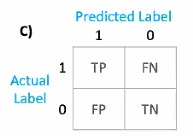

###Logistic Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logistic_1_2 = LogisticRegression(random_state = 1111, max_iter = 1000)
logistic_1_2.fit(X_2train[:, np.newaxis], y_2train[:, np.newaxis])

y_pred_1_2_in = logistic_1.predict(X_2train[:, np.newaxis])
y_pred_1_2_out = logistic_1.predict(X_2eval[:, np.newaxis])

prob_1_2_in = logistic_1.predict_proba(X_2train[:, np.newaxis])

print("Probabilidades")
print(prob_1_2_in)
print("Predicción de Clase")
print(y_pred_1_2_in)

print("Error cuadrático en muestra", mean_squared_error(y_2train, y_pred_1_2_in))
print("Error cuadrático en muestra", mean_squared_error(y_2eval, y_pred_1_2_out))

cm_logistic_in_2 = confusion_matrix(y_2train, y_pred_1_2_in)
cm_logistic_out_2 = confusion_matrix(y_2eval, y_pred_1_2_out)

print(logistic_1_2.coef_)

print(cm_logistic_in_2)
print(cm_logistic_out_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Probabilidades
[[0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.60939721 0.39060279]
 [0.48270176 0.51729824]
 [0.60939721 0.39060279]
 [0.609397

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy

Para el anáisis Logístico, tanto dentro de muestra como por fuera, se cuenta con más verdaderos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo logit puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a ser o no bebedor social. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos. 

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB 

NB_2_2 = MultinomialNB()
NB_2_2.fit(X_2train[:, np.newaxis], y_2train[:, np.newaxis])

y_pred_2_in_2 = NB_2_2.predict(X_2train[:, np.newaxis])
y_pred_2_out_2 = NB_2_2.predict(X_2eval[:, np.newaxis])

prob_2_in_2 = NB_2_2.predict_proba(X_2train[:, np.newaxis])

print("Probabilidades")
print(prob_2_in_2)
print("Predicción de Clase")
print(y_pred_2_in_2)

cm_NB_in_2 = confusion_matrix(y_2train, y_pred_2_in_2)
cm_NB_out_2 = confusion_matrix(y_2eval, y_pred_2_out_2)

print(NB_2_2.coef_)

print(cm_NB_in_2)
print(cm_NB_out_2)

Probabilidades
[[0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.55384615 0.44615385]
 [0.553846

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing inst

Para el caso de este modelo, no es posible confiar enlas probabilidades obtenidas, ya que sería inutil realizar predicciones sobre un modelo que le asigna una probabilidad de 0 a las características observadasen las predicciones de clase, lo cual es sesgado si se tiene en cuenta que en la matriz de confusión, existen 58 falsos positivos dentro de muestra, y 54 fuera de la misma.

###Linear Discriminar Analysis



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_3_2 = LinearDiscriminantAnalysis() 
LDA_3_2.fit(X_2train[:, np.newaxis], y_2train[:, np.newaxis])

y_pred_3_in_2 = LDA_3_2.predict(X_2train[:, np.newaxis])
y_pred_3_out_2 = LDA_3_2.predict(X_2eval[:, np.newaxis])

prob_3_out_2 = LDA_3_2.predict_proba(X_2eval[:, np.newaxis])

print("Probabilidades")
print(prob_3_out_2)
print("Predicción de Clase")
print(y_pred_3_out_2)

cm_LDA_in_2 = confusion_matrix(y_2train, y_pred_3_in_2)
cm_LDA_out_2 = confusion_matrix(y_2eval, y_pred_3_out_2)

print(LDA_3_2.coef_)

print(cm_LDA_in_2)
print(cm_LDA_out_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert 

Probabilidades
[[0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.37491574 0.62508426]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.76769897 0.23230103]
 [0.374915

Para el anáisis a través del modelo Linear Discriminar Analysis, tanto dentro de muestra y por fuera de muestra, se cuenta con más verdederos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo LDA puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a ser o no bebedor social. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos dentro de muestra.

***Adicionalmente, para este modelo, se encuentra que hay más probabilidad de que los siguientes casos de absentismo laboral en esta empresa de mensajería de Brasil, para las dos principales razones descritas anteriormente, correspondan a un bebedor social.***

###Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC


SVC_4_2 = SVC(kernel= "linear", probability=True)
SVC_4_2.fit(X_2train[:, np.newaxis], y_2train[:, np.newaxis])
y_pred_4_in_2 = SVC_4_2.predict(X_2train[:, np.newaxis])
y_pred_4_out_2 = SVC_4_2.predict(X_2eval[:, np.newaxis])

prob_4_out_2 = SVC_4_2.predict_proba(X_2eval[:, np.newaxis])

print("Probabilidades")
print(prob_4_out_2)
print("Predicción de Clase")
print(y_pred_4_out_2)

cm_SVC_in_2 = confusion_matrix(y_2train, y_pred_4_in_2)
cm_SVC_out_2 = confusion_matrix(y_2eval, y_pred_4_out_2)

print(SVC_4_2.coef_)

print(cm_SVC_in_2)
print(cm_SVC_out_2)

Probabilidades
[[0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.39268474 0.60731526]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.75239195 0.24760805]
 [0.392684

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will

Para el anáisis a través del modelo Vector Machine, tanto dentro de muestra y por fuera de muestra, se cuenta con más verdederos positivos y verdaderos negativos, que falsos positivos y falsos negativos. Esto podría indicar que el modelo Vector Machine puede servir para realizar una buena estimación del comportamiento futuro del absentismo laboral por consultas médicas y odontológicas, sujeto a tener o no tener hijos. Sin embargo, los casos de falsos positivos y negativos no son mínimos, siendo aproximadamente la mitad de los verdaderos positivos y negativos dentro de muestra.  


##**Conclusión**

Para el análisis de clasificación de las razones de absentismo correspondientes a consulta médica y consulta odontológica, respecto a tener hijos o no, o ser un bebedor social o no, se enuentra que los modelos que podrían determinar una mejor predicción son Logistic Regression, Linear Discriminar Analyisis y Support Vector Machine. Por otra parte, el modelo Naive Bayes no arroja probabilidades confiables para el análisis, por lo cual sus resultados predictivos deberían ser descartados para este caso. Para los modelos categorizados de mejor predicción, se encuentra que hay más probabilidad de que los siguientes casos de absentismo laboral en esta empresa de mensajería de Brasil, para las dos principales razones descritas anteriormente, correspondan a un bebedor social y a un individuo que no tenga hijos.